In [1]:
%load_ext autoreload
%autoreload 2

from math import pi
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

from root_pandas import read_root

Welcome to JupyROOT 6.10/04


In [2]:
import ROOT
from matplotlib.colors import LogNorm

In [3]:
plt.rcParams.update({'font.size': 18})

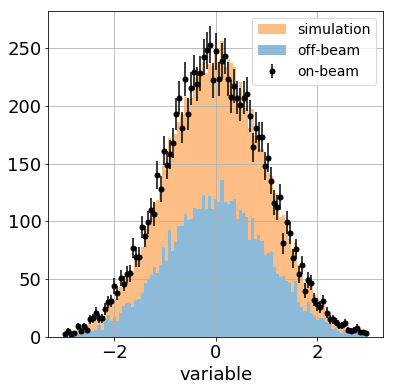

In [4]:
onBeam  = np.random.normal(0.,1.,10000)
offBeam = np.random.normal(0.,1.,10000)
MC      = np.random.normal(0.,1.,50000)

nON  = len(onBeam)
nOFF = len(offBeam)
nMC  = len(MC)

weightsON  = np.ones(nON)  * 1
weightsOFF = np.ones(nOFF) * 0.5 # factor needed to scale off-beam to on-beam
weightsMC  = np.ones(nMC)  * 0.1 # factor needed to scale MC to on-beam

WEIGHTS = [weightsOFF,weightsMC]


FIGSIZE = (6,6)


LABELS = ['off-beam','simulation']

BINS = np.linspace(-3,3,100)

fig = plt.figure(figsize=FIGSIZE)

xstacked = [offBeam,MC]

# stack off-beam and MC
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS,stacked=True,alpha=0.5)
# plot data separately as data-points
vals,bine = np.histogram(onBeam,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='on-beam')

plt.grid()
plt.xlabel('variable')
plt.legend(loc=1,fontsize=14)
plt.show()